# H1

In [3]:
library(rethinking)
library(plyr)
library(dplyr)
library(data.table)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [4]:
mp <- map2stan(
    alist(
        a ~ dnorm(0, 1),
        b ~ dcauchy(0, 1)
    ),
    data = list(y = 1), 
    start = list(a = 0, b = 0),
    iter = 1e4, warmup = 100, WAIC = F
)


SAMPLING FOR MODEL 'a ~ dnorm(0, 1)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: WARNING: There aren't enough warmup iterations to fit the
Chain 1:          three stages of adaptation as currently configured.
Chain 1:          Reducing each adaptation stage to 15%/75%/10% of
Chain 1:          the given number of warmup iterations:
Chain 1:            init_buffer = 15
Chain 1:            adapt_window = 75
Chain 1:            term_buffer = 10
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration:  101 / 10000 [  1%]  (Sampling)
Chain 1: Iteration: 1100 / 10000 [ 11%]  (Sampling)
Chain 1: Iteration: 2100 / 10000 [ 21%]  (Sampling)
Chain 1: Iteration: 3100 / 10000 [ 31%]  (Sampling)
Chain 1: Iteration: 4100 / 10000 [ 41%]  (Sampling)
Chain 1: Iteration: 5100 / 10000 [ 51%]  (Samp

Warning message:
"There were 28 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"


SAMPLING FOR MODEL 'a ~ dnorm(0, 1)' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: WARNING: No variance estimation is
Chain 1:          performed for num_warmup < 20
Chain 1: 
Chain 1: Iteration: 1 / 1 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0 seconds (Warm-up)
Chain 1:                0 seconds (Sampling)
Chain 1:                0 seconds (Total)
Chain 1: 


   Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a  0.01   1.00      -1.55       1.63  9948    1
b -0.42 224.74      -7.04       7.65   349    1

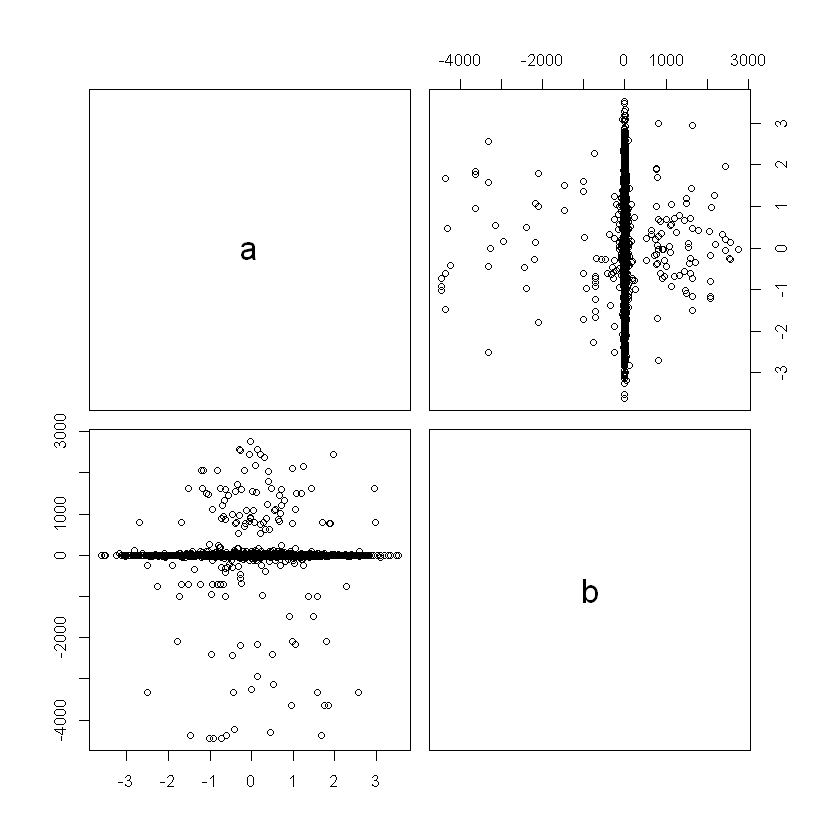

In [8]:
precis(mp)

post <- extract.samples(mp)
pairs(post)

map2stan model fit
9900 samples from 1 chain

Formula:
a ~ dnorm(0, 1)
b ~ dcauchy(0, 1)

Log-likelihood at expected values: 0 
Deviance: 0 
DIC: 0 
Effective number of parameters (pD): 0 


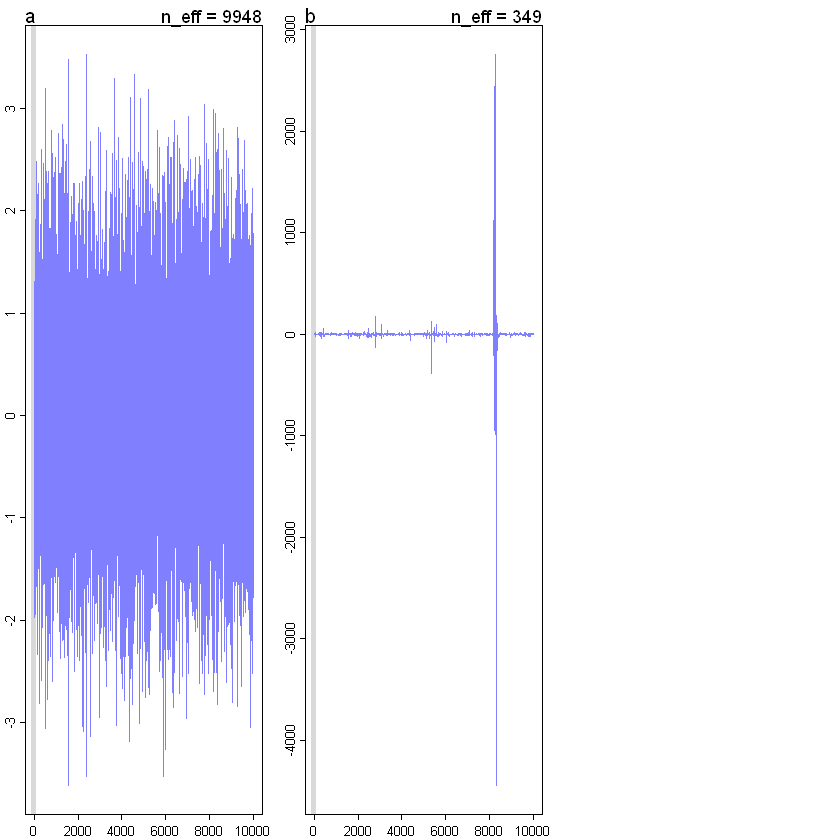

In [10]:
show(mp)
plot(mp)

In [11]:
stancode(mp)

data{
    int<lower=1> N;
}
parameters{
    real a;
    real b;
}
model{
    b ~ cauchy( 0 , 1 );
    a ~ normal( 0 , 1 );
}
generated quantities{
    real dev;
    dev = 0;
}


Cauchy distribution has much fatter tails so it's more probable to see extreme values in the traceplot for b compared to the traceplot for b that has a normal prior.

# H2